In [2]:
# load mat file
import scipy.io as sio
import numpy as np

# load mat file
X = sio.loadmat('../../results/X.mat')['X']
Y = sio.loadmat('../../results/Y.mat')['Y']
Z = sio.loadmat('../../results/Z.mat')['Z']

In [3]:
X.shape

(101, 101)

/tmp/ipykernel_34379/364049001.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("rainbow")  # this can be changed to any colormap you like
/tmp/ipykernel_34379/364049001.py:58: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(pos[0, 0, 0], pos[0, 0, 1], c=color, s=200, marker='*', label=f'step {i}')


Text(0.5, 1.0, 'horizon = 512')

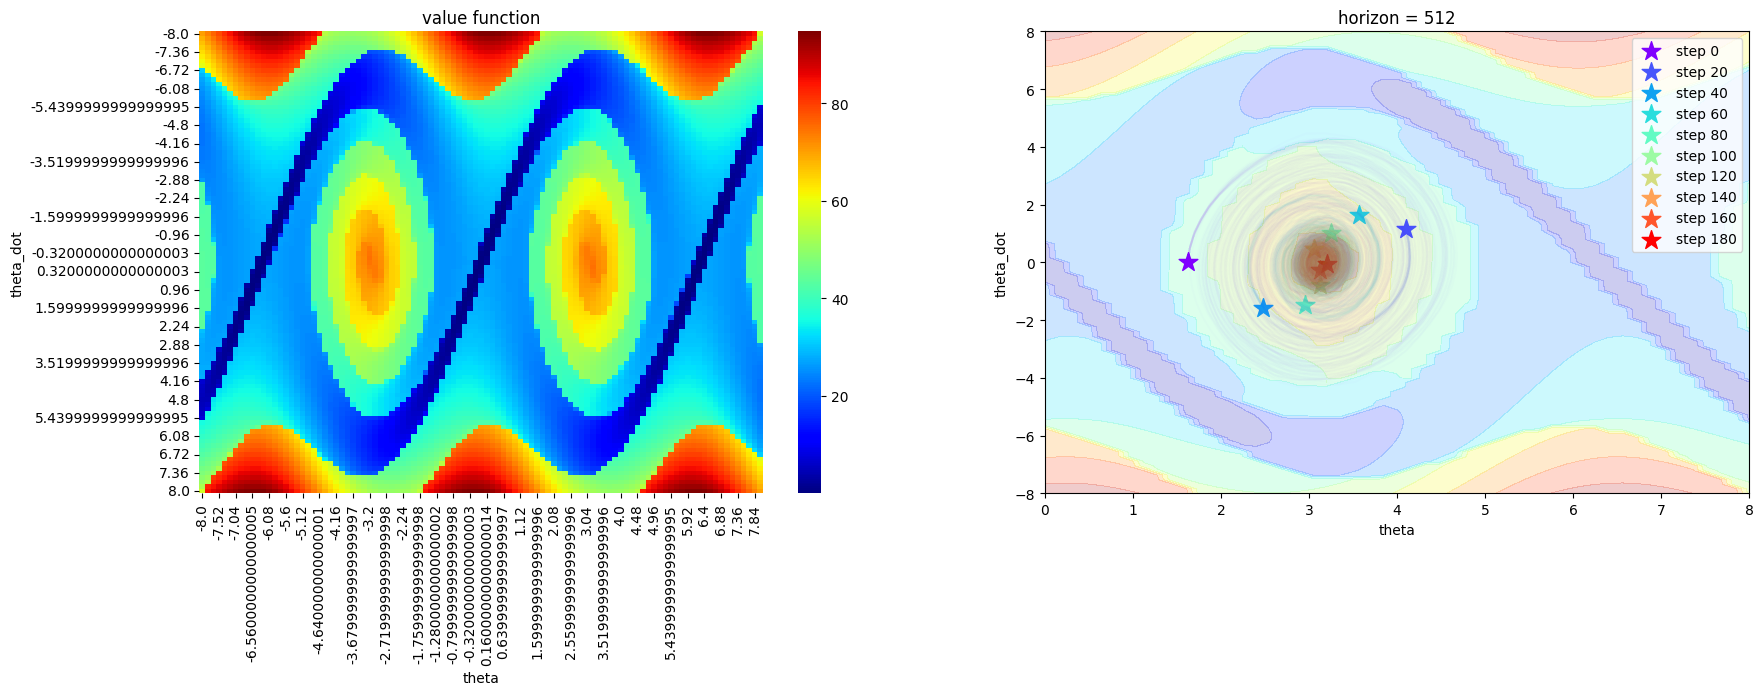

In [4]:
# plot X, Y, Z in 2d contour 
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from jax import numpy as jnp
import pandas as pd

fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# # plot 3d surface
# ax = axes[0]
# # set ax as 3d
# ax = ax.add_subplot(projection='3d')
# ax.set_title('value function')
# ax.set_xlabel('theta')
# ax.set_ylabel('theta_dot')
# ax.set_zlabel('value')
# ax.plot_surface(X, Y, Z, cmap='jet', alpha=0.5)


ax = axes[0]
Z_heatmap_data = pd.DataFrame(Z, index=X[0, :], columns=Y[:, 0])
sns.heatmap(Z_heatmap_data, cmap='jet', ax=ax)
ax.set_title('value function')
ax.set_xlabel('theta')
ax.set_ylabel('theta_dot')

ax = axes[1]
ax.set_xlim(-0.0, 8.0)
ax.contourf(X, Y, Z, 10, cmap='jet', alpha=0.2)
# show color bar
# cbar = fig.colorbar(ax=ax)
# plot heatmap

total_step = 200
plot_interval = 20
plot_num = total_step // plot_interval

# generate one color for each plot
cmap = cm.get_cmap("rainbow")  # this can be changed to any colormap you like
colors = []
indices = np.linspace(0, cmap.N, plot_num)  # 10 evenly spaced indices
for idx in indices:
    colors.append(cmap(int(idx)))

for i in range(0, total_step, plot_interval):
    xt = jnp.load(f'../../results/highpen_thetas_{i}.npy') # shape (33, 1024)
    yt = jnp.load(f'../../results/highpen_theta_dots_{i}.npy') # shape (33, 1024)
    # xt = xt.T
    # yt = yt.T
    pos = jnp.stack([xt.T, yt.T], axis=-1) # shape (1024, 33, 2)
    pos_mean = jnp.mean(pos, axis=0)
    pos_cov = jnp.std(pos, axis=0)
    # print(pos_cov.shape)
    # plot 1 std area with fill_between
    # ax.fill_between(pos_mean[:, 0], pos_mean[:, 1] - pos_std[:, 1]*2, pos_mean[:, 1] + pos_std[:, 1]*2, alpha=0.2)
    color=colors[i//plot_interval]
    ax.scatter(pos[0, 0, 0], pos[0, 0, 1], c=color, s=200, marker='*', label=f'step {i}')
    for j in range(20):
        ax.plot(pos[j, :, 0], pos[j, :, 1], color=color, alpha=0.01)
ax.legend()
ax.set_xlabel('theta')
ax.set_ylabel('theta_dot')

ax.set_title("horizon = 512")

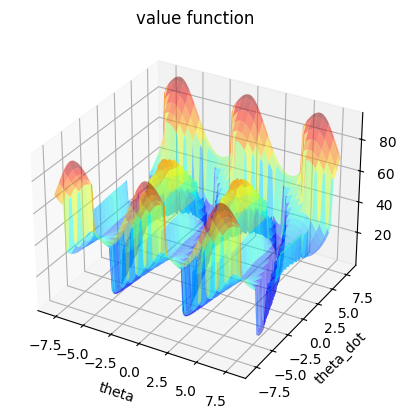

In [5]:
# plot 3d surface

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_title('value function')
ax.set_xlabel('theta')
ax.set_ylabel('theta_dot')
ax.set_zlabel('value')
ax.plot_surface(X, Y, Z, cmap='jet', alpha=0.5)

In [6]:
# generate one color for each plot
cmap = cm.get_cmap("rainbow")  # this can be changed to any colormap you like
colors = []
indices = np.linspace(0, cmap.N, 10)  # 10 evenly spaced indices
for idx in indices:
    colors.append(cmap(int(idx)))

/tmp/ipykernel_34379/3806696463.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("rainbow")  # this can be changed to any colormap you like


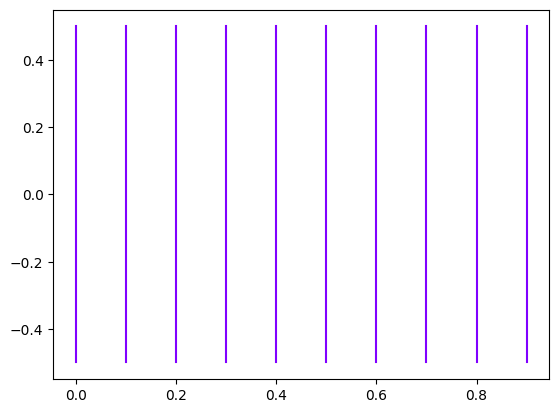

In [7]:
import numpy as np
for k in range(10):
    plt.plot(np.ones(10)*k/10, np.linspace(-0.5, 0.5, 10), color=colors[0])